## Simulating absorption of neurotransmitters diffusing in a synapse cleft

In [1]:
import sys
sys.path.append("../../")

from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from Numeric.RandomWalkSingleBoundary import RandomWalkSingleBoundary
from Numeric.Utility import get_absorption_frac

### Step distribution

In order to make a random walk that simulates the diffusion equation well, we need to consider a multitude of parameters. The first parameter to condsider is the step length, which follows some distribution. Initially, we chose the lognormal distribution because the step length was absolute in norm.

In [2]:
step = lognorm(.01, -0.5)

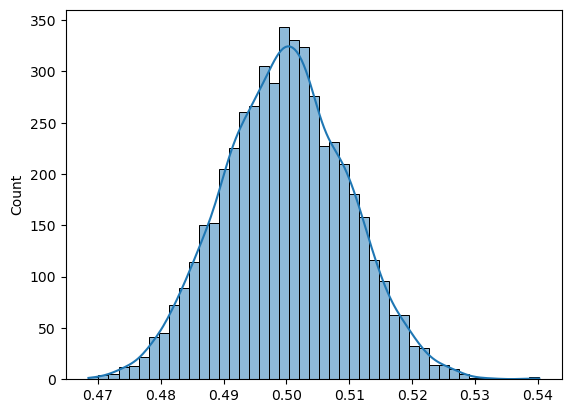

In [3]:
sample_size=5000
sns.histplot(step.rvs(size=sample_size), kde=True);

The simulation has since been changed to taking steps from this distribution in *each* direction. In order to make the analysis easier, we will use the normal distribution instead.

In [4]:
Nstep = 10000

In [5]:
step = norm(0, 15e-9/np.sqrt(Nstep))

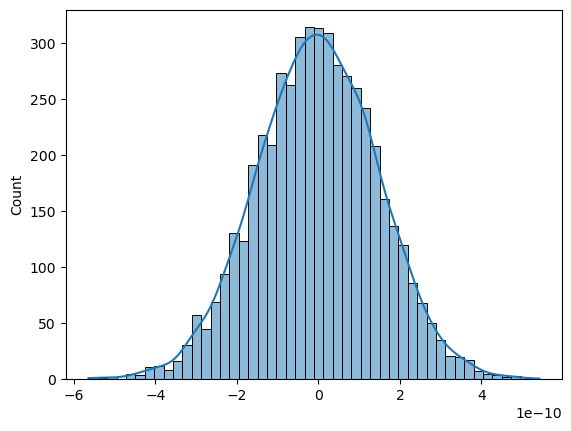

In [6]:
sample_size=5000
sns.histplot(step.rvs(size=sample_size), kde=True);

Letting $X$, $Y$ and $Z$ be the step lengths which are all distributed by $\mathcal{N}(0, \sigma^2)$, we get the square step length
$$
R^2 = X^2 + Y^2 + Z^2 \sim \sigma^2\chi^2_3 = \Gamma\left(\frac{3}{2}, 2\sigma\right)
$$
where we utilized that the step length in each direction is a scaled standard normal variable. We can find the distribution of the step length by scaling the Gamma distribution, which I will do as soon as I have the motivation. Note that this assumes the same step length distribution in all directions, which may very well not be realistic, but other distributions are not compatible with this particular analysis.

### Simulation

We are now ready to simulate the random walk. Choosing a z boundary at 1, 10000 timesteps (which is undefined in relation to physical time) and 1000 particles, we get the following results.

In [7]:
RW = RandomWalkSingleBoundary(N=5000, Nstep=Nstep, step=step, z_boundary=15e-9)

After one timestep:

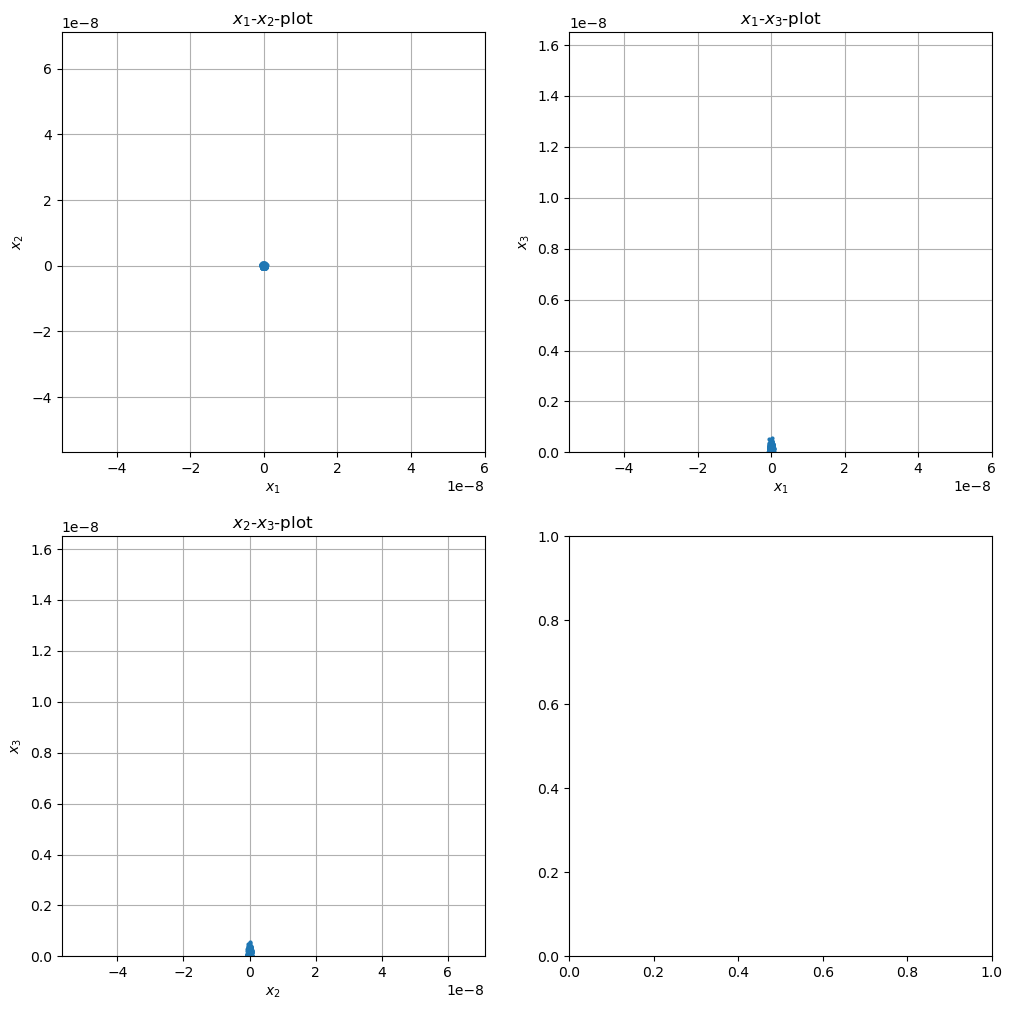

In [8]:
RW.plot2D(timestep=1, markersize=2)

At the last timestep:

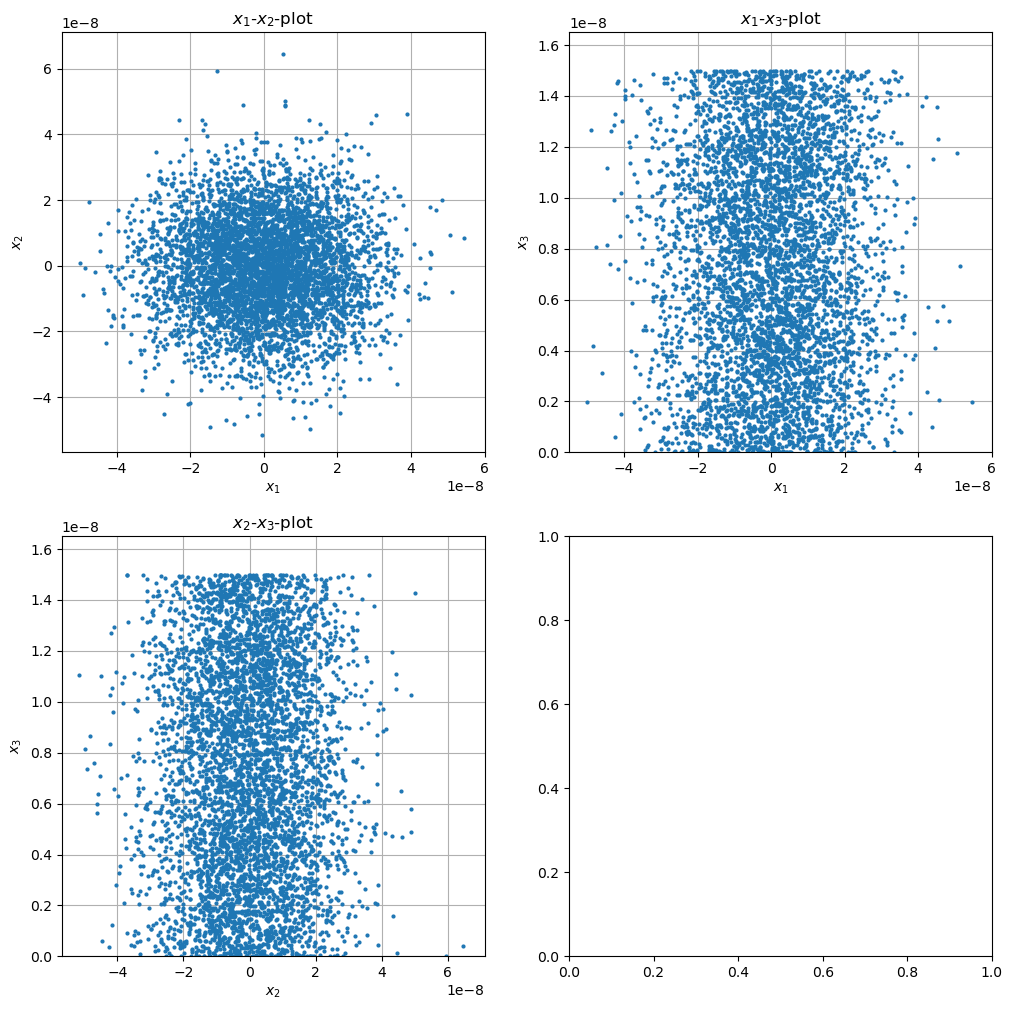

In [9]:
RW.plot2D(markersize=2)

Text(0.5, 0.5, 'y')

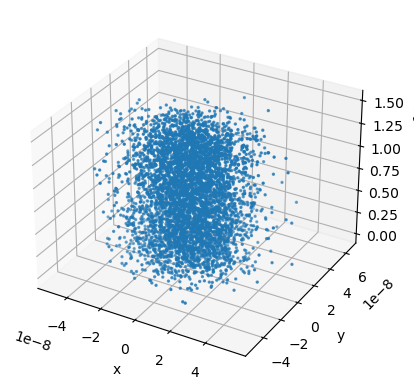

In [10]:
RW.scatter(s=2)
plt.xlabel("x")
plt.ylabel("y")
# plt.zlabel("z")

The following function searches through the data of the simulation and determines the fraction of molecules that at some point during the course of the simulation has been in the region $\mathcal{A}$, which is defined by
$$
\mathcal{A} = \{(x, y, z) | x^2 + y^2 < R^2, \: z_{boundary} - z < \epsilon\}
$$
where $z_{boundary}$ is the same boundary that was determined in the simulation. This represents the fraction of molecules that have been observed by receptors, as it is assumed that the reaction happens considerably faster than diffusion, and therefore that all particles that visit $\mathcal{A}$ are absorbed.

In [11]:
get_absorption_frac(RW, 220e-9, 1.5e-9)

0.6962

The results tell us that with a diameter of the same size as the synapse heigh, about 54% of the neurotransmitters are absorbed after 10000 timesteps of length $R$, which follows some scaled Gamma distribution (again, I will calculate this later). What remains is to fine tune the parameters and finish the calculations such that the simulation matches the solution to the diffusion equation.